<a href="https://colab.research.google.com/github/dohyeon-kim012/MachineLearning-DeepLearning/blob/main/DeepLearning/07.%EC%88%98%EC%B9%98%EB%AF%B8%EB%B6%84%2C%20%ED%8E%B8%EB%AF%B8%EB%B6%84%2C%20%EA%B8%B0%EC%9A%B8%EA%B8%B0%2C%20%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미분

한 순간 ( 매우 작은 변화 ) 에서의 변화량 ( 기울기 ) 를 구하는 것  

    -> 변화량이 0일 때가 '순간'인데 변화량은 0일 수 없기 때문에  
        1. 수학적으로 분모는 0이 될 수 없다  
        2. 의미적으로 '변화량'을 구하는 것이기 때문에 0에 무한히 가깝게 할 수는 있지만 0은 아님

변화량 : $\frac{y의변화량}{x의변화량}$

---

$x$ 한 순간 ($x$에 대해 매우 작은 변화가 일어났을 때)의 변화량  

$$\frac{ df(x) }{ dx }  = \lim_{h\to 0} \frac{f(x+h) - f(x)}{ (x+h)-x }=\lim_{h\to 0} \frac{f(x+h) - f(x)}{ h }$$

- $d$ : 델타 delta
- $lim$ : 리미트
- ${h\to 0}$ : $h$ 변화량이 0에 가까워지도록

In [ ]:
import numpy as np

# 수치미분

# 1. 미분의 나쁜 구현을 먼저 보기
def numerical_diff(f, x):
    '''
        f : 미분 대상 함수
        x : x인 순간의 기울기를 구하기 위한 지점
    '''

    # 순간을 구하기 위해 h를 0이 아닌 0에 아주 가까운 숫자로 지정
    
    h = 10e-50  # 정말정말 작은 h 값 부여
    return (f(x+h)- f(x)) / h

너무나 작은 숫자로 나눗셈을 하게 되면, 컴퓨팅 시스템상 부동소수점 오류가 발생한다. (반올림 오차)
  * 소수점 어느 특정 부터는 계산을 할 수 없음.
  * `0.000000000000000000000000000000000000000000000000001`를 `0.0`으로 인식

In [ ]:
np.float32(10e-50)

0.0

In [ ]:
1 / np.float32(1e-50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

## 전방차분과 중앙차분을 이용한 미분

수치 미분의 오차를 줄이기 위해 사용하는 방법  
$x$를 중심으로 그 전후의 차분을 계산한다는 의미로 **중심 차분** 혹은 **중앙 차분**   

$(x + h) -> x$ : **전방 차분**  
$x -> (x - h)$ : **후방 차분**

$f(x+h)$와 $f(x-h)$를 지나는 직선 => **$x$의 접선과 평행**

---

$$
\frac{ df(x) }{ dx }  =  \lim_{h\to 0} \frac{f(x+h) - f(x-h)}{ x+h - (x-h) } = \lim_{h\to 0} \frac{f(x+h) - f(x-h)}{ 2h }
$$

In [ ]:
# 2. 향상된 미분 함수
def numerical_diff(f, x):
    h = 1e-4 # 0.0001이 제일 적당하다고 알려져 있음
    return (f(x+h) - f(x-h)) / (2*h)

## 수치미분 
numerical differentiation  

아주 작은 차분 ( 임의 두 점에서의 함수 값들의 차이 ) 으로 미분하는 것  

```
해석적 미분 : 정석 미분  
수치 미분 : 해석적 미분을 '근사치'로 계산하는 방법
```

### 수치미분의 예시

$$
f(x) = y = 0.01x^2 + 0.1x
$$

In [ ]:
# 수치미분 구현

def function_1(x):
    return 0.01*x**2 + 0.1*x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

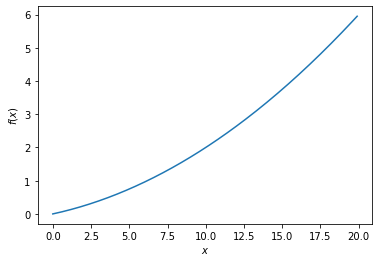

In [ ]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel(f'$x$')
plt.ylabel(f'$f(x)$')
plt.plot(x, y)
plt.show()

In [ ]:
print("x가 5일 떄의 미분값 : {:.1f}".format(numerical_diff(function_1, 5)))
print("x가 10일 때의 미분값 : {:.1f}".format(numerical_diff(function_1, 10)))

x가 5일 떄의 미분값 : 0.2
x가 10일 때의 미분값 : 0.3


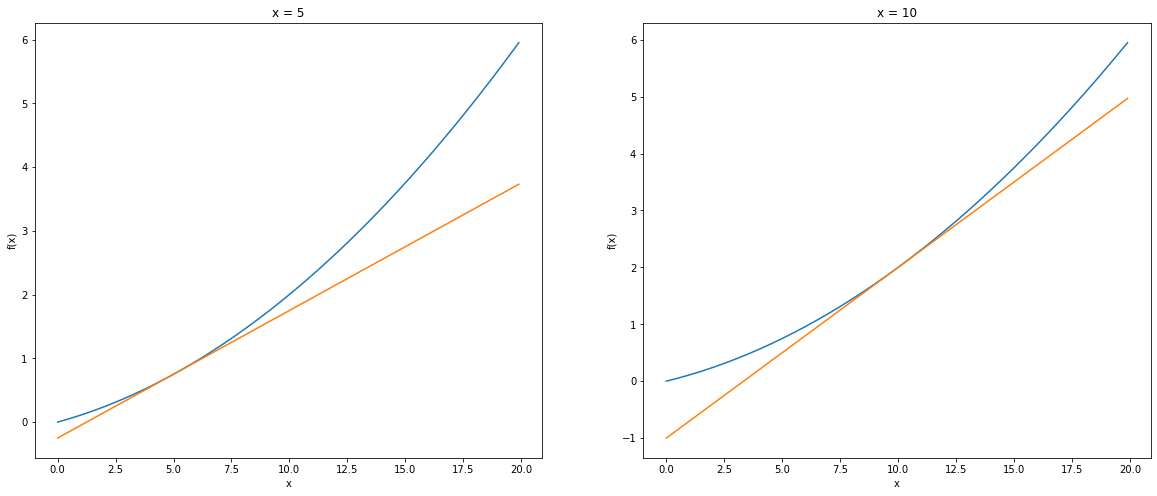

In [ ]:
# 미분값을 이용한 접선 시각화
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

fig, axes = plt.subplots(1,2, figsize=(20,8))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

axes[0].plot(x, y)
axes[0].plot(x, y2)
axes[0].set_title("x = 5")

axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

axes[1].plot(x, y)
axes[1].plot(x, y2)
axes[1].set_title("x = 10")
plt.show()

## 편미분

변수가 여럿인 함수에 대한 미분  $\frac{\partial f}{\partial x_0}$  

    --> 여러 개의 인수 중 하나만 미분 하는 것

변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함  
    
    --> 목표 변수 하나에 초점을 맞추고, 다른 변수(미분하지 않는 쪽)은 값을 고정


편미분의 예시  
$$
f(x_0, x_1) = x^2_0 + x^2_1
$$


In [ ]:
# 편미분 구현

# x : 배열
def function_2(x):
    return x[0]**2 + x[1]**2
    # = return np.sum(x**2)

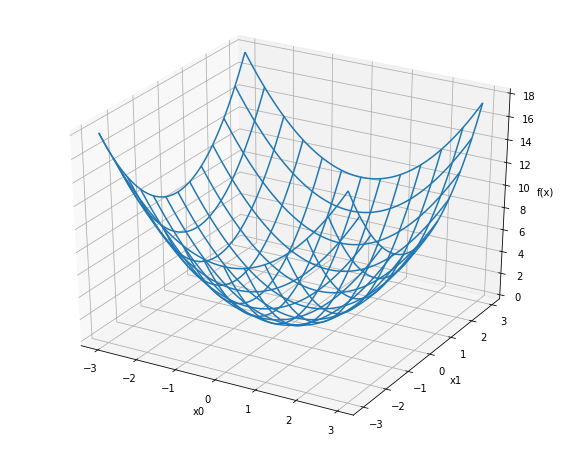

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

X0 = np.arange(-3, 3, 0.05)
X1 = np.arange(-3, 3, 0.05)

X0, X1 = np.meshgrid(X0, X1)
Z = function_2([X0,X1])

ax.plot_wireframe(X=X0, Y=X1, Z=Z,rstride=10, cstride=10)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
plt.show()

## 문제 1
$x_0=3, x_1=4$ 일 때 $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$를 구하시오. `답 : 약 6.0`

In [ ]:
def function_tmp1(x0):
    return x0**2 + 4.0**2

print("{:.1f}".format(numerical_diff(function_tmp1, 3.0)))

6.0


## 문제 2
$x_0=3, x_1=4$ 일 때 $x_1$에 대한 편미분 $\frac{\partial f}{\partial x_1}$를 구하시오. `답 : 약 8.0`

In [ ]:
def function_tmp1(x1):
    return 3**2 + x1**2

print("{:.1f}".format(numerical_diff(function_tmp1, 4.0)))

8.0


# 기울기 ( gradient)

ex. $(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$ 

**기울기** : 위와 같이 **모든 변수의 편미분을 벡터로 정리한 것**

$x_0$에 대한 기울기와, $x_1$의 기울기를 따로 따로 구해서 확인
* $x_0=3, x_1=4$ 일때의 미분을 각각 구함
* $\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$ 각각 구해봄

* 각 방향의( $x_0$, $x_1$ ) 기울기를 하나로 묶어서 벡터화 시킨다.
  * 즉 우리는 $(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$를 구할 것이다.
  
  * --> 각 변수의 방향을 알 수 있게 된다.

In [ ]:
# 의미파악을 위한 함수임
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 shape이 같은 0으로 채워진 배열을 만든다

    for idx in range(x.size):
        # 각 x에 대한 편미분을 수행
        tmp_val = x[idx] # idx : 좌표

        # 전방차분 f(x+h) 계산
        x[idx] = tmp_val + h # 목표로 하고 있는 x의 변화량을 구하기 위함
        fxh1 = f(x) # 변화량을 준 (tmp_val + h) x에 대한 전방차분 구하기

        # 후방차분 f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1-fxh2) / (2*h) # 미분 수행
        x[idx] = tmp_val # 원래 값으로 복원하기

    return grad

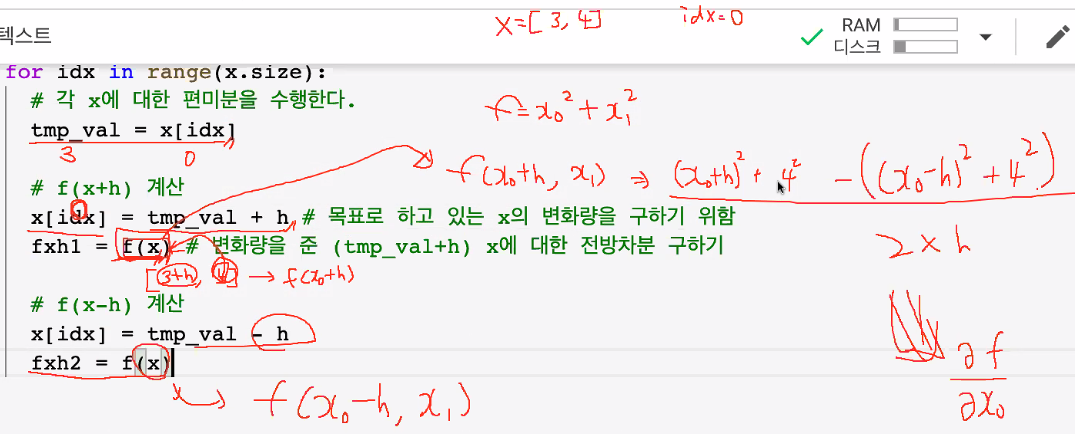

In [ ]:
x = np.array([3.0, 4.0])
print("x = [3, 4] 일 때의 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = np.array([1.0, 2.0])
print("x = [1, 2] 일 때의 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = np.array([1.0, 1.0])
print("x = [1, 1] 일 때의 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = np.array([0.3, 0.3])
print("x = [0.3, 0.3] 일 때의 기울기 배열 : {}".format(numerical_gradient(function_2, x)))

x = np.array([0.01, 0.01])
print("x = [0.01, 0.01] 일 때의 기울기 배열 : {}".format(numerical_gradient(function_2, x)))


x = [3, 4] 일 때의 기울기 배열 : [6. 8.]
x = [1, 2] 일 때의 기울기 배열 : [2. 4.]
x = [1, 1] 일 때의 기울기 배열 : [2. 2.]
x = [0.3, 0.3] 일 때의 기울기 배열 : [0.6 0.6]
x = [0.01, 0.01] 일 때의 기울기 배열 : [0.02 0.02]


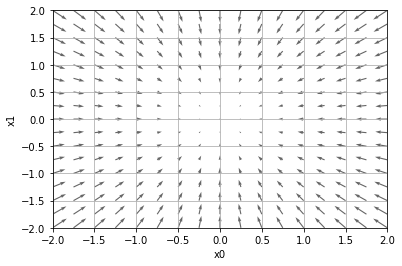

In [ ]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

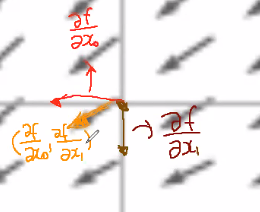

↑ 위의 3차원 그래프를 위쪽 방향에서 봤을 때

* $\left ( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right )$을 벡터로 묶어서 표현

- 화살표의 길이 : 기울기가 크다/작다  
- 화살표의 방향 : 기울기 방향

---

**기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값 ( 결과 값) 을 가장 크게 줄이는 방향**

- 최소지점으로 가기 위한 $x_0$과 $x_1$의 방향과 크기를 시각화
- 기울기가 클 수록 더 많이 움직여야 한다

# ★★★ **경사하강법 ( 경사법 )** ★★★  

Gradient Descent  
기울기를 줄여 나가는 방법  

최초 지점에서 시작해서 **함수의 값이 최소지점**이 되는 방향으로  
일정 거리만큼 이동하며 기울기를 **수정(갱신)**

---

**경사하강법의 원리**  

현 위치에서 기울어진 방향으로 일정 거리만큼 이동  

- **일정 거리**의 의미 : 매번 일정한 거리를 의미하는게 아닌, 미분 값을 보고 갱신되어야 할 수치를 **일정하게 조정**  

----> **학습률 ( learning rate : $\eta$ 에타 )** - 하이퍼 파라미터

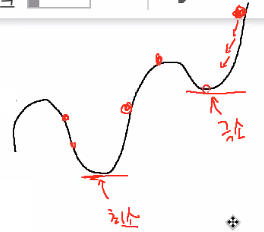


예시) 지팡이를 짚은 사람이 언덕을 내려갈 때

지팡이 : 기울기를 알려줌, 미분  
보폭 (이동 거리) : 학습률 learning rate  

미분을 이용해 기울기를 확인하며 이동할 거리와 방향을 정해 기울기를 줄여나가는 것을 **반복 ( step )**

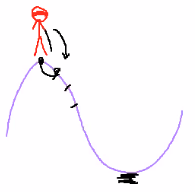

## 경사하강법의 수식  

$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
$$

$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_1}
$$

기울기가 음수일 때 x의 값은 +로 가야 하고, 기울기가 양수일 때 x의 값이 -가 되어야 하기 때문에, 에타 앞에 '-' 가 있음

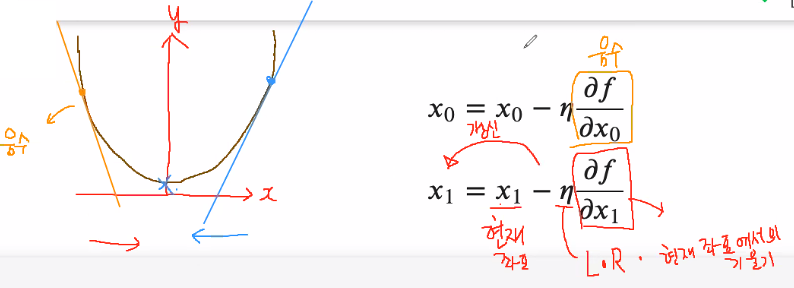

In [ ]:
# 경사하강법 구현
#   함수 내부에서 "미분"이 일어나야 함!
# f : 경사하강법을 수행할 함수 ( 미분 대상 함수 )
# init_x : x의 최초 지점
# lr : learning rate
# step_num : 경사하강법 수행 횟수 

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        # 1. 기울기 배열 구하기 - 미분 수행
        grads = numerical_gradient(f, x)
        print("좌표 : {} / 기울기 : {}".format(x, grads)) # 현 위치, 기울기 표시

        # 2. 경사하강법 공식을 이용한 좌표 갱신
        x = x - lr*grads

    # 3. 최종 갱신이 완료된 좌표를 출력
    return x 

In [ ]:
def function_2(x):
    return np.sum(x**2)

In [ ]:
start_x = np.array([-3.0, 4.0])
gradient_descent(function_2, start_x, lr=0.1)

In [ ]:
start_x = np.array([4.0, 6.0])
gradient_descent(function_2, start_x, lr=0.1, step_num=10)

좌표 : [4. 6.] / 기울기 : [ 8. 12.]
좌표 : [3.2 4.8] / 기울기 : [6.4 9.6]
좌표 : [2.56 3.84] / 기울기 : [5.12 7.68]
좌표 : [2.048 3.072] / 기울기 : [4.096 6.144]
좌표 : [1.6384 2.4576] / 기울기 : [3.2768 4.9152]
좌표 : [1.31072 1.96608] / 기울기 : [2.62144 3.93216]
좌표 : [1.048576 1.572864] / 기울기 : [2.097152 3.145728]
좌표 : [0.8388608 1.2582912] / 기울기 : [1.6777216 2.5165824]
좌표 : [0.67108864 1.00663296] / 기울기 : [1.34217728 2.01326592]
좌표 : [0.53687091 0.80530637] / 기울기 : [1.07374182 1.61061274]


array([0.42949673, 0.64424509])

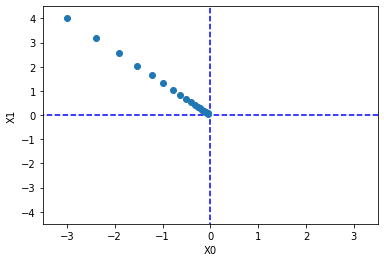

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

학습률(Learning Rate)가 너무 크거나 작을 때

In [ ]:
# 학습률이 너무 클 때 lr=10
start_x = np.array([-3.0, 4.0])
result = gradient_descent(function_2, start_x, lr=10.0)
print("Learning Rate 10.0 : {}".format(result))

갱신이 너무 크게 크게 되어서 최소지점을 넘어 아예 건너편으로 passing by 해버린 상황  
- 발산


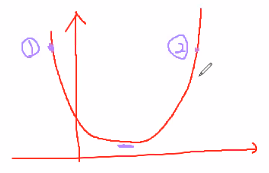

In [ ]:
# 학습률이 너무 작을 때 lr=1e-10
start_x = np.array([-3.0, 4.0])
result, _ = gradient_descent(function_2, start_x, lr=1e-10)
print("Learning Rate 1e-10 : {}".format(result))

Learning Rate 1e-10 : [-2.99999994  3.99999992]


학습률이 너무 작으면 최소지점으로 가지 못 하고 갱신이 끝난다

## 신경망에서의 Gradient Descent

손실값(Loss)를 최소로 하는 모델 파라미터를 구하는 과정  

: **최적화 ( Optimization ) 과정**  
- 경사하강법 : 여러 최적화 기법 중 하나
---

신경망에서의 모델 파라미터는 ?  

--> **가중치 ($W$) , 편향 ($b$)**  

따라서 Loss를 최소화 하기 위한 **가중치와 편향**을 구하는 과정을 **최적화**라고 함  

----> **신경망의 학습** 

---

미분은 이렇게 쓰인다  
1. 가중치 ($W$) 와 편향 ($b$) 을 편미분에서 쓰이는 `변수`로    
2. Loss 값 ($L$) 을 편미분의 `함수 f`로  
3. 다음의 수식이 도출됨  
$\frac{\partial L}{\partial W}$ , $\frac{\partial L}{\partial b}$ 

---

위의 수식에 다음과 같은 원리를 적용시킬 수도 있을 것이다  

$$
W=\begin{pmatrix} w_{11} & w_{21} & w_{31} \\ w_{12}&w_{22}&w_{32} \\\end{pmatrix}, b = \left (b_1, b_2, b_3 \right )
$$

$$
\frac{\partial L}{\partial W}=\begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\ \frac{\partial L}{\partial w_{12}}&\frac{\partial L}{\partial w_{22}}&\frac{\partial L}{\partial w_{32}} \\\end{pmatrix}, \frac{\partial L}{\partial b} = \left (\frac{\partial L}{\partial b_1}, \frac{\partial L}{\partial b_2}, \frac{\partial L}{\partial b_3} \right )
$$

---

**가중치 $W$ 와 편향 $b$ 를 갱신하기 위한 경사하강법 공식**  

$$
W = W-\eta \frac{\partial L}{\partial W}, b = b - \eta \frac{\partial L}{\partial b}
$$

In [ ]:
# 실습에 필요한 함수들
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        it.iternext()   
    return grad

## SimpleNet 만들기  

입력을 두 개 받고 ( $[x_1, x_2]$ ), 3개의 뉴런을 가진 신경망  

편향 고려 X, 가중치만 사용

In [ ]:
# 신경망 클래스
class SimpleNet:

    # 초기화에서는 신경망이 초기에 가지고 있어야 할 매개변수 세팅해야 함
    # 즉, 신경망 매개변수 초기화 작업을 생성자 __init__ 메소드에서 수행
    def __init__(self):
        '''
        초기화 방법
        1. 정규분포 랜덤 * 0.01 사용  - 기본으로 쓰고 잘 안 되면 2,3 시도
        2. 카이밍 히 초기값 (He 초기값) 
        - ReLU를 Activation Function으로 사용할 때 사용하는 초기화 방식
        3. 사비에르 Xavier 초기값 (글로로트 초기값) 
        - Sigmoid를 Activation Function으로 사용할 때
        '''
        self.W = np.random.randn(2, 3) * 0.01  # 1번 방식 사용
    
    def predict(self, x):
        return x @ self.W

    def loss(self, x, t):
        # 손실(loss)를 구할 때 필요한 것
        # 예측값(y), 정답(t), loss 함수( cross entropy error )
        z = self.predict(x)
        y = softmax(z)

        loss = cross_entropy_error(y, t)
        return loss

히든층은 아예 없고 출력층만 있는 간단한 신경망을 구축함

In [ ]:
net = SimpleNet()
print("가중치 : \n{}".format(net.W))

가중치 : 
[[ 0.00362884  0.00688715  0.00978344]
 [ 0.00325083  0.0008003  -0.00133652]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)

print("예측값 : {}".format(p))

예측값 : [0.03506364 0.01822214 0.00362484]


In [ ]:
t = np.array([1, 0, 0])
t_error = np.array([0, 0, 1])

print("정답을 잘 예측했을 때의 Loss : {:.3f}".format(net.loss(x, t)))
print("정답을 잘못 예측했을 때의 Loss : {:.3f}".format(net.loss(x, t_error)))

정답을 잘 예측했을 때의 Loss : 1.096
정답을 잘못 예측했을 때의 Loss : 1.101


$$
\frac{\partial L}{\partial W}=\begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\ \frac{\partial L}{\partial w_{12}}&\frac{\partial L}{\partial w_{22}}&\frac{\partial L}{\partial w_{32}} \\\end{pmatrix}
$$

위의 수식에서는 분자가 "함수"여야 변수 W를 받아 변화값을 출력함  
그러나, 지금 만들어둔 함수 `loss`는 이미 "상수값"이기 때문에  
변수 W을 받아 변화하지 않음  

--> 따라서 손실 함수 `f`를 다시 정의해 줘야 함

In [ ]:
'''
1. Loss 를 구하기 위한 함수를 재정의
2. 가중치 W에 대한
3. 따라서 `dL / dW`를 구해야 함

4. net.loss를 미분할 함수를 따로 만들 것임 ( 모델 파라미터 W에 대한 미분값)
'''
def f(W):
    return net.loss(x, t)

# 입력값 W 는 loss 내부의 predict 함수에 이미 포함되어 있음
# or lambda 함수 활용 -> loss_w = lambda W : net.loss(x, t)

In [ ]:
# Loss를 구하는 함수 f에 대한 모든 W들의 기울기를 구할 수 있음
# W의 각 원소에 대한 편미분 수행됨

dW = numerical_gradient(f, net.W)  # W가 변화될 때의 loss의 변화량 
print(dW)

[[-1.05805848  0.53289037  0.52516811]
 [-5.95157887  2.99750844  2.95407071]]


위의 배열은 다음의 값들과 상응한다
$$
\begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\ \frac{\partial L}{\partial w_{12}}&\frac{\partial L}{\partial w_{22}}&\frac{\partial L}{\partial w_{32}} \\\end{pmatrix}
$$  
--> $W_{11}$이 $h$만큼 증가하면 $loss$는 위 값의 첫 번째 원소만큼 감소한다

# 학습이 가능한 MNIST 신경망 구현
* 2층 신경망
* 1층 은닉층의 뉴런 개수 100개
  * 활성화 함수로 `sigmoid` 함수
* 2층 출력층의 뉴런 개수 10개
  * 활성화 함수로 `softmax` 사용
* loss함수는 `cross_entropy_error`
-----
* `predict`에서 `softmax`사용할 것
* 클래스 내부에 기울기 배열을 구하는 `numerical_gradient_params`를 구현
* **경사하강법**은 클래스 내부에서 구현하지 않는다. - 하지 말란 이야기

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size=28*28, hidden_size=100, output_size=10, weight_init_std=0.01):
    '''
      input_size: 입력 데이터의 shape (N, 28*28)
      hidden_size: 은닉층의 뉴런 개수
      output_size: 출력층의 뉴런 개수
      weight_init_std: 정규 분포 랜덤값에 표준편차 0.01을 적용하기 위함
    '''

    # 1, 2층 매개변수 초기화
    self.params = {
        # 가중치는 정규 분포 랜덤
        'W1': np.random.randn(input_size, hidden_size) * weight_init_std,
        'W2': np.random.randn(hidden_size, output_size) * weight_init_std,
        # 편향은 0으로 
        'b1': np.zeros(hidden_size), 
        'b2': np.zeros(output_size)
    }

  def predict(self, x):
    # 마지막 출력층에서 softmax 사용하기
    # 클래스의 가중치와 편향을 가져온다.
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    
    # 1층 구현 (은닉층)
    Z1 = x @ W1 + b1
    A1 = sigmoid(Z1)
    
    # 2층 구현 (출력층)
    Z2 = A1 @ W2 + b2
    y = softmax(Z2)
    return y
  
  # 매개변수 반드시 설정
  def loss(self, x, t):
    y = self.predict(x)
    loss_val = cross_entropy_error(y, t)
    return loss_val
  
  # 미분(numerical_gradient)을 이용한 '각 매개변수 별 기울기 배열 구하기'
  def numerical_gradient_params(self, x, t):
    # 각 층에서 구해지는 기울기를 저장할 딕셔너리
    # 저장할 것: 각 매개변수의 기울기들(W1, W2, b1, b2)을 저장,
    #             나중에 이 기울기들로 경사하강법 수행 예정
    
    print("------미분 시작-------")
    # 어떤 파라미터에 대한 loss 값을 구할 수 있는 함수 정의
    # def f(W, b):
    #   return self.loss(self.x, t)
    f = lambda p: self.loss(x, t)
    
    # 1, 2층 매개변수에 대한 기울기 구하기 : loss에 대한 파라미터들의 기울기를 grads에 저장
    grads = {
        'W1': numerical_gradient(f, self.params['W1']), # dL / dW1
        'W2': numerical_gradient(f, self.params['W2']), # dL / dW2
        'b1': numerical_gradient(f, self.params['b1']), # dL / db1
        'b2': numerical_gradient(f, self.params['b2']) # dL / db2
    }

    print("-------미분 끝-------")
    return grads

## MNIST 데이터 불러오기 및 전처리

In [ ]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, t_train), (X_test, t_test) = mnist.load_data()

X_train.shape, t_train.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

### 데이터 전처리
* `t_train, t_test` : onehot인코딩 해볼 예정 (안 해도 됨)  
- `X_train, X_test` : `(N, 28*28) 형태로 평탄화 되어야 함  


In [ ]:
# 1. 원핫인코딩
import tensorflow as tf

# .numpy() : tensorflow 배열을 numpy 배열로 바꿔줌
t_train_one_hot = tf.one_hot(t_train, 10).numpy()
t_test_one_hot = tf.one_hot(t_test, 10).numpy()

t_train_one_hot.shape, t_test_one_hot.shape

((60000, 10), (10000, 10))

In [ ]:
# 2. 평탄화 시키기
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### 이미지 데이터 정규화  

이미지 데이터는 기본적으로 항상 0 ~ 255 사이의 정수값 가짐  

0 ~ 255는 데이터끼리의 매우 큰 차이이기 때문에 **0~1 사이로 정규화**  
- 255.0 으로 나누어서 최소를 0, 최대를 1로 갖는 이미지로 만들기
- 일반적으로 입력 이미지의 픽셀 값을 0 ~ 1 사이로 맞추는게 가장 좋음

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## 훈련을 하기 위한 하이퍼 파라미터 설정하기

1. 미니 배치 개수 설정
2. 훈련 반복 횟수 설정 = 경사하강법 적용 횟수
3. 학습률 설정

In [ ]:
# 반복 횟수 설정
iter_nums = 10000

# 미니 배치 설정
train_size = X_train.shape[0]
batch_size = 100

# 학습률 설정
learning_rate = 0.1

In [ ]:
# 신경망 만들기
net = TwoLayerNet()

In [ ]:
# 반복문 돌릴 때 진행상황을 프로그래스바로 시각화하는 패키지
from tqdm import tqdm_notebook

# sequence(range)를 tqdm_notebook으로 감싸주면 됨
for i in tqdm_notebook(range(iter_nums)):
    # 1. 미니 배치 인덱스 선정(마스크 만들기)
    #       60000개 중 batch_size(100)개 만큼의 랜덤한 인덱스 뽑기
    batch_mask = np.random.choice(train_size, batch_size)

    # 2. 미니 배치 만들기
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 3. 각 매개변수의 기울기 배열 구하기 ( 미분 수행 )
    #       기울기를 알아야 경사하강법(최적화)를 수행할 수 있기 때문
    grads = net.numerical_gradient_params(X_batch, t_batch)

    # 4. 구한 기울기로 경사하강법 수행
    #       grads 딕셔너리의 키 값과 params 딕셔너리의 키 값이 똑같음
    #       --> 동일한 딕셔너리에 동일한 경사하강법 수행 가능함
    keys = ["W1", "W2", "b1", "b2"]

    for key in keys:
        net.params[key] = net.params[key] - (learning_rate * grads[key])
        # = net.params[key] -= learning_rate * grads[key]

    # 갱신된 loss 확인
    loss = net.loss(X_batch, t_batch)
    print("Step {} -> Loss : {}".format(i+1, loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


------미분 시작-------
-------미분 끝-------
Step 1 -> Loss : 2.2941495871582323
------미분 시작-------
-------미분 끝-------
Step 2 -> Loss : 2.265234359980293
------미분 시작-------
-------미분 끝-------
Step 3 -> Loss : 2.263615297267841
------미분 시작-------
-------미분 끝-------
Step 4 -> Loss : 2.265587102187086
------미분 시작-------
-------미분 끝-------
Step 5 -> Loss : 2.283549354008463
------미분 시작-------


KeyboardInterrupt: ignored

$$
W = W-\eta \frac{\partial L}{\partial W}
$$

### 시간이 오래 걸리는 이유

신경망을 구축하고 나서 신경망 자체를 이해하는데 제일 좋은 방법  
: 매개변수의 개수를 세어보는 것

In [ ]:
# 1층의 매개변수 개수
net.params['W1'].shape, net.params['b1'].shape

((784, 100), (100,))

- 1층의 $W$ : 78,400개
- 1층의 $b$ : 100개

총 78,500개

In [ ]:
# 2층의 매개변수 개수
net.params["W2"].shape, net.params['b2'].shape

((100, 10), (10,))

- 2층의 $W$ : 1,000개
- 2층의 $b$ : 10개

총 1,010개

우리가 만든 신경망의 총 매개변수의 개수는  
: 78,500 + 1,010 = 79,510 개

배치를 100개씩(미니배치) 돌리고 있을 때 훈련 한 번당 미분하는 횟수는  
: 총 매개변수 개수 * 배치 개수 = 79,510 * 100 = 7,951,000

---

시간이 오래 걸리는 원인은 결국 **미분**  
-> 따라서 이제부터는 미분을 하지 않을 예정  
----> 대신, 미분 하지 않고 미분값을 구하는 방법을 배울 것  

: **오차역전파**